##### Introduction & Objective

Goal:

##### Data Loading & Initial Inspection

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
# read the CSV file
df = pd.read_csv('bank_transactions_data.csv')
# display the first few rows of the dataframe
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [3]:
# inspect the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [4]:
# change the data type of the 'TransactionDate' column to datetime with format year-month-day hour-minute-second
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%Y-%m-%d %H:%M:%S')
print('Data type of TransactionDate is now:', df['TransactionDate'].dtype)
# change the data type of the 'PreviousTransactionDate' column to datetime with format year-month-day hour-minute-second
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'], format='%Y-%m-%d %H:%M:%S')
print('Data type of PreviousTransactionDate is now:',df['PreviousTransactionDate'].dtype)

Data type of TransactionDate is now: datetime64[ns]
Data type of PreviousTransactionDate is now: datetime64[ns]


In [5]:
# check for missing values
print(df.isnull().sum())

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [6]:
# check for duplicates
print('Number of exact duplicates:',df.duplicated().sum())

Number of exact duplicates: 0


In [7]:
# check for duplicates in key transaction features (excluding TransactionID)
duplicates = df.duplicated(subset=['AccountID', 'TransactionAmount', 'TransactionDate']).sum()
print(duplicates)

0


In [8]:
# check for unique values in each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

TransactionID: 2512 unique values
AccountID: 495 unique values
TransactionAmount: 2455 unique values
TransactionDate: 2512 unique values
TransactionType: 2 unique values
Location: 43 unique values
DeviceID: 681 unique values
IP Address: 592 unique values
MerchantID: 100 unique values
Channel: 3 unique values
CustomerAge: 63 unique values
CustomerOccupation: 4 unique values
TransactionDuration: 288 unique values
LoginAttempts: 5 unique values
AccountBalance: 2510 unique values
PreviousTransactionDate: 360 unique values


In [9]:
#change the data type of the 'TransactionType' column to category
df['TransactionType'] = df['TransactionType'].astype('category')
print('Data type of TransactionType is now:',df['TransactionType'].dtype)
# change the data type of the 'Channel' column to category
df['Channel'] = df['Channel'].astype('category')
print('Data type of Channel is now:',df['Channel'].dtype)

Data type of TransactionType is now: category
Data type of Channel is now: category


In [10]:
# describe the data with all columns included
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,NaN,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,NaN
top,TX002496,AC00460,NaN,NaN,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,NaN
freq,1,12,NaN,NaN,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,NaN
mean,NaN,NaN,297.593778,2023-07-05 20:32:10.826433024,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024
min,NaN,NaN,0.260000,2023-01-02 16:00:06,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,NaN,NaN,81.885000,2023-04-03 16:22:05.750000128,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,2024-11-04 08:07:53
50%,NaN,NaN,211.140000,2023-07-07 17:49:43.500000,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,2024-11-04 08:09:22
75%,NaN,NaN,414.527500,2023-10-06 18:40:53.500000,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872
max,NaN,NaN,1919.110000,2024-01-01 18:21:50,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,300.000000,5.000000,14977.990000,2024-11-04 08:12:23


##### Data Cleaning

In [11]:
# check location column for formatting issues
df['Location'].unique()

array(['San Diego', 'Houston', 'Mesa', 'Raleigh', 'Atlanta',
       'Oklahoma City', 'Seattle', 'Indianapolis', 'Detroit', 'Nashville',
       'Albuquerque', 'Memphis', 'Louisville', 'Denver', 'Austin',
       'Columbus', 'Los Angeles', 'Las Vegas', 'Fort Worth', 'Miami',
       'Milwaukee', 'Baltimore', 'New York', 'San Francisco', 'San Jose',
       'San Antonio', 'Philadelphia', 'Charlotte', 'Tucson', 'Chicago',
       'Sacramento', 'Kansas City', 'Omaha', 'Virginia Beach', 'Dallas',
       'Boston', 'Jacksonville', 'Phoenix', 'Washington', 'El Paso',
       'Colorado Springs', 'Fresno', 'Portland'], dtype=object)

In [12]:
# validate the format of the IP address in the 'IP Address' column
# The regex pattern checks for four groups of 1 to 3 digits separated by dots, ensuring that each group is between 0 and 255.
df['IsValidIP'] = df['IP Address'].apply(lambda x: bool(re.match(r'^\d{1,3}(\.\d{1,3}){3}$', x)))
df['IsValidIP'].value_counts()

IsValidIP
True    2512
Name: count, dtype: int64

In [13]:
# extract the hour from the 'TransactionDate' column and create a new column 'TransactionHour'
df['TransactionHour'] = df['TransactionDate'].dt.hour
print(df[['TransactionDate', 'TransactionHour']].head())

      TransactionDate  TransactionHour
0 2023-04-11 16:29:14               16
1 2023-06-27 16:44:19               16
2 2023-07-10 18:16:08               18
3 2023-05-05 16:32:11               16
4 2023-10-16 17:51:24               17


In [14]:
# create a new column for high-value transactions
# Assuming high-value transactions are defined as those in the top 10% of transaction amounts
high_value_threshold = df['TransactionAmount'].quantile(0.90)
print(f"The 90th percentile for TransactionAmount is: {high_value_threshold}")

df['IsHighValueTransaction'] = df['TransactionAmount'] > high_value_threshold

print(df[['TransactionAmount', 'IsHighValueTransaction']].head())

The 90th percentile for TransactionAmount is: 701.3120000000004
   TransactionAmount  IsHighValueTransaction
0              14.09                   False
1             376.24                   False
2             126.29                   False
3             184.50                   False
4              13.45                   False


In [15]:
# calculate days between transaction date and previous transaction date
df['DaysBetweenTransactions'] = (df['PreviousTransactionDate'] - df['TransactionDate']).dt.days
df['DaysBetweenTransactions'].describe()

count    2512.000000
mean      486.857882
std       106.378910
min       307.000000
25%       394.000000
50%       485.000000
75%       580.000000
max       671.000000
Name: DaysBetweenTransactions, dtype: float64

##### Exploratory Data Analysis (EDA)

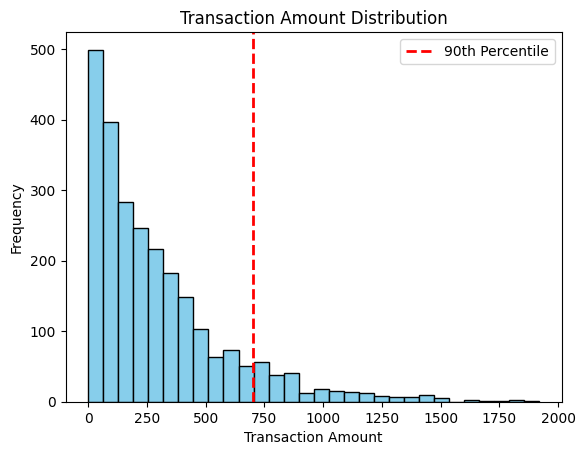

In [16]:
import matplotlib.pyplot as plt

plt.hist(df['TransactionAmount'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(high_value_threshold, color='red', linestyle='dashed', linewidth=2, label='90th Percentile')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()
